In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
import scipy
import itertools
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline


## How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in car_data.csv.
The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D
6. Type: body type such as sedan, coupe, etc.
7. Cylinder: number of cylinders in the engine
8. Liter: a more specific measure of engine size
9. Doors: number of doors
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)



### Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's R2 score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [53]:
df = pd.read_csv("car_data.csv")

In [54]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [55]:
x_and_y = df[['Mileage', 'Price']]

In [56]:
x_and_y.head()

,Mileage,Price
0,8221,17314.103129
1,9135,17542.036083
2,13196,16218.847862
3,16342,16336.913140
4,19832,16339.170324


In [57]:
x = x_and_y['Mileage']
y = x_and_y['Price']
train_X, test_X, train_y, test_y = train_test_split(x, y, random_state=101)

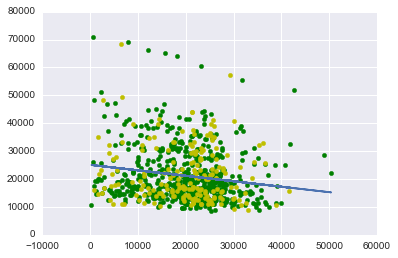

In [58]:
model = Pipeline([
    ('poly', PolynomialFeatures(degree=1)),
    ('linear', LinearRegression(fit_intercept=False))])
model_fit = model.fit(train_X.reshape(-1, 1), train_y.reshape(-1, 1))
plt.scatter(train_X, train_y, color='g')
plt.scatter(test_X, test_y, color='y')
plt.plot(x.reshape(-1, 1), model.predict(x.reshape(-1, 1)))
plt.show()

In [59]:
print('Mileage R2 Score: ', model.score(x.reshape(-1, 1), y.reshape(-1, 1)))

Mileage R2 Score:  0.019829422002


### Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's R2 score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

In [60]:
new_frame = df[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather', 'Price']]

In [61]:
new_frame.head()

,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Price
0,8221,6,3.1,4,1,1,1,17314.103129
1,9135,6,3.1,4,1,1,0,17542.036083
2,13196,6,3.1,4,1,1,0,16218.847862
3,16342,6,3.1,4,1,0,0,16336.913140
4,19832,6,3.1,4,1,0,1,16339.170324


In [62]:
mileage = linear_model.LinearRegression()
cylinder = linear_model.LinearRegression()
liter = linear_model.LinearRegression()
doors = linear_model.LinearRegression()
cruise = linear_model.LinearRegression()
sound = linear_model.LinearRegression()
leather = linear_model.LinearRegression()

In [63]:
mileage.fit(new_frame[['Mileage']], new_frame[['Price']])
cylinder.fit(new_frame[['Cylinder']], new_frame[['Price']])
liter.fit(new_frame[['Liter']], new_frame[['Price']])
doors.fit(new_frame[['Doors']], new_frame[['Price']])
cruise.fit(new_frame[['Cruise']], new_frame[['Price']])
sound.fit(new_frame[['Sound']], new_frame[['Price']])
leather.fit(new_frame[['Leather']], new_frame[['Price']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [64]:
print('Mileage R2 Score: ', mileage.score(new_frame[['Mileage']], new_frame[['Price']]))
print('Mileage Coefficient: ', mileage.coef_)
print('Mileage Intercept: ', mileage.intercept_)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('Cylinder R2 Score: ', cylinder.score(new_frame[['Cylinder']], new_frame[['Price']]))
print('Cylinder Coefficient: ', cylinder.coef_)
print('Cylinder Intercept: ', cylinder.intercept_)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('Liter R2 Score: ', liter.score(new_frame[['Liter']], new_frame[['Price']]))
print('Liter Coefficient: ', liter.coef_)
print('Liter Intercept: ', liter.intercept_)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('Doors R2 Score: ', doors.score(new_frame[['Doors']], new_frame[['Price']]))
print('Doors Coefficient: ', doors.coef_)
print('Doors Intercept: ', doors.intercept_)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('Cruise R2 Score: ', cruise.score(new_frame[['Cruise']], new_frame[['Price']]))
print('Cruise Coefficient: ', cruise.coef_)
print('Cruise Intercept: ', cruise.intercept_)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('Sound R2 Score: ', sound.score(new_frame[['Sound']], new_frame[['Price']]))
print('Sound Coefficient: ', sound.coef_)
print('Sound Intercept: ', sound.intercept_)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('Leather R2 Score: ', leather.score(new_frame[['Leather']], new_frame[['Price']]))
print('Leather Coefficient: ', leather.coef_)
print('Leather Intercept: ', leather.intercept_)

Mileage R2 Score:  0.0204634473235
Mileage Coefficient:  [[-0.1725205]]
Mileage Intercept:  [ 24764.55900606]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Cylinder R2 Score:  0.323859037595
Cylinder Coefficient:  [[ 4054.20250438]]
Cylinder Intercept:  [-17.05748707]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Liter R2 Score:  0.311526744279
Liter Coefficient:  [[ 4990.39345781]]
Liter Intercept:  [ 6185.75468278]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Doors R2 Score:  0.0192514665915
Doors Coefficient:  [[-1613.23238515]]
Doors Intercept:  [ 27033.60029005]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Cruise R2 Score:  0.185633009297
Cruise Coefficient:  [[ 9862.32659956]]
Cruise Intercept:  [ 13921.86566691]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Sound R2 Score:  0.0154623876242
Sound Coefficient:  [[-2631.40749469]]
Sound Intercept:  [ 23130.14437939]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Leather R2 Score:  0.0247108512641
Leather Coefficient:  [[ 3473.4566033]]
Leather Intercept:  [ 18

The best indicator for price is number of cylinders, number of liters, and mileage on the car.

In [89]:
feature_columns = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
price = df['Price']

combinations = [list(itertools.combinations(feature_columns, x)) for x in range(1,7)]
massaged_combos = []
for lst in combinations:
    for iterable in lst:
        massaged_combos.append(list(iterable))

scores = []
for lst in massaged_combos:
    regr_cars = linear_model.LinearRegression()
    regr_cars.fit(df[lst], price)
    scores.append((regr_cars.score(df[lst], price), lst))
    
sorted(scores, reverse=True)

[(0.4456909210587025,
  ['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather']),
 (0.43780574153663798,
  ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Leather']),
 (0.4369402151237245, ['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Leather']),
 (0.43014148406475605,
  ['Mileage', 'Cylinder', 'Liter', 'Cruise', 'Sound', 'Leather']),
 (0.43001820483252673, ['Mileage', 'Cylinder', 'Cruise', 'Sound', 'Leather']),
 (0.4265348637809262,
  ['Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']),
 (0.42576813279744208, ['Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather']),
 (0.42482840454267845,
  ['Mileage', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']),
 (0.42441824017998753,
  ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound']),
 (0.42409748258510394, ['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound']),
 (0.4225307670398466, ['Mileage', 'Cylinder', 'Liter', 'Cruise', 'Leather']),
 (0.42250742147747633, ['Mileage', 'Cylinder', 'Cruise', 'Leather']),
 (0.419658

'Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', and 'Leather' are the best predictors of price.

### Tasks, Part 3

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [94]:
dummy_make = pd.get_dummies(df[['Make']])
dummy_model = pd.get_dummies(df[['Model']])
dummy_type = pd.get_dummies(df[['Type']])

In [95]:
dummy_make.head()

,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn
0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0


In [96]:
dummy_model.head()

,Model_9-2X AWD,Model_9_3,Model_9_3 HO,Model_9_5,Model_9_5 HO,Model_AVEO,Model_Bonneville,Model_CST-V,Model_CTS,Model_Cavalier,...,Model_Lacrosse,Model_Lesabre,Model_Malibu,Model_Monte Carlo,Model_Park Avenue,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
dummy_type.head()

,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0


In [99]:
feature_columns2 = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather', dummy_make, dummy_model, dummy_type]
price2 = df['Price']

combinations2 = [list(itertools.combinations(feature_columns2, x)) for x in range(1,10)]
massaged_combos2 = []
for lst in combinations2:
    for iterable in lst:
        massaged_combos2.append(list(iterable))

scores2 = []
for lst in massaged_combos2:
    regr_cars2 = linear_model.LinearRegression()
    regr_cars2.fit(df[lst], price2)
    scores2.append((regr_cars2.score(df[lst], price2), lst))
    
sorted(scores2, reverse=True)

ValueError: cannot copy sequence with size 804 to array axis with dimension 6

In [ ]:
dict_df = df.to_dict('records') #will create a dataframe with all columns in original dataframe converted to dictionary